# Prepare a prediction model for profit of 50_startups data.
#### Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.


### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

### Reading the dataset

In [2]:
startups = pd.read_csv('50_startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
startups.shape

(50, 5)

### Renaming the column names

In [6]:
startups = startups.rename(columns = {'R&D Spend' : 'R_D_Spend' ,'Administration' : 'Administration','Marketing Spend' : 'Marketing_Spend','Profit' : 'Profit'}, inplace = False)

In [7]:
startups.head()

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Correlation

In [8]:
startups.corr()

,R_D_Spend,Administration,Marketing_Spend,Profit
R_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Visualization of data

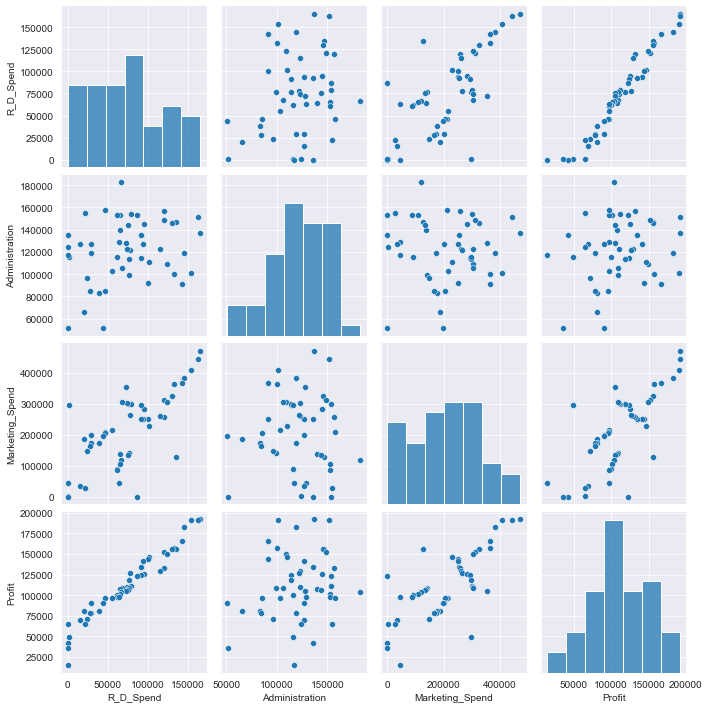

In [9]:
sns.set_style(style = 'darkgrid')
sns.pairplot(startups)

### Preparing a model

In [10]:
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data = startups).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           4.53e-30
Time:                        13:28:05   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Beta coefficient

In [13]:
model.params

Intercept          50122.192990
R_D_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

with 1 unit increase in R_D_Spend

Profit also increases by 0.8057

and

with 1 unit increase in Administration

Profit value will reduce by 0.0268

becoz R_D_Spend is positive and Administration is negative

### t values and p values

In [14]:
print(model.tvalues, '\n' ,model.pvalues)

Intercept           7.626218
R_D_Spend          17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
R_D_Spend          2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


###  R Squared values 

In [15]:
(model.rsquared, model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

### Calculationg VIF

In [18]:
rsq_rd = smf.ols('R_D_Spend~Administration+Marketing_Spend', data = startups).fit().rsquared
vif_rd = 1/(1-rsq_rd)

rsq_ad = smf.ols('Administration~R_D_Spend+Marketing_Spend', data = startups).fit().rsquared
vif_ad = 1/(1-rsq_ad)

rsq_ms = smf.ols('Marketing_Spend~R_D_Spend+Administration', data = startups).fit().rsquared
vif_ms = 1/(1-rsq_ms)

# Starting vif values in a data frame
d1 = {'Variables':['R_D_Spend','Administration','Marketing_Spend'], 'VIF':[vif_rd, vif_ad, vif_ms]}
vif_frame = pd.DataFrame(d1)
vif_frame

<ipython-input-18-c758f304b323>:2: RuntimeWarning: divide by zero encountered in double_scalars
  vif_rd = 1/(1-rsq_rd)
<ipython-input-18-c758f304b323>:5: RuntimeWarning: divide by zero encountered in double_scalars
  vif_ad = 1/(1-rsq_ad)


,Variables,VIF
0,R_D_Spend,inf
1,Administration,inf
2,Marketing_Spend,2.103206


In [17]:
startups['Predicted'] = model.fittedvalues
startups['Errors'] = model.resid
startups

,R_D_Spend,Administration,Marketing_Spend,State,Profit,Predicted,Errors
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183
5,131876.90,99814.71,362861.36,New York,156991.12,163580.780571,-6589.660571
6,134615.46,147198.87,127716.82,California,156122.51,158114.096669,-1991.586669
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.363048,-4268.763048
8,120542.52,148718.95,311613.29,New York,152211.77,151741.699699,470.070301
9,123334.88,108679.17,304981.62,California,149759.96,154884.684110,-5124.724110


### Residual Analysis

#### Test for Normality of residuals (Q-Q plot)

Text(0.5, 1.0, 'Normal Q-Q plot of residuals')

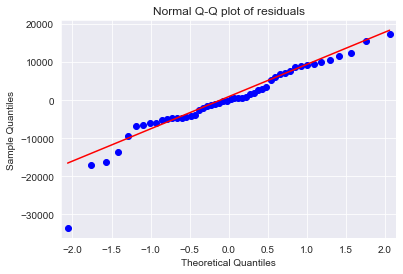

In [20]:
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')

In [21]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [22]:
list(np.where(model.resid>10000))

[array([10, 12, 16, 36, 38, 45], dtype=int64)]

In [23]:
list(np.where(model.resid<-10000))

[array([14, 15, 48, 49], dtype=int64)]

C:\Users\D_R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Errors'>

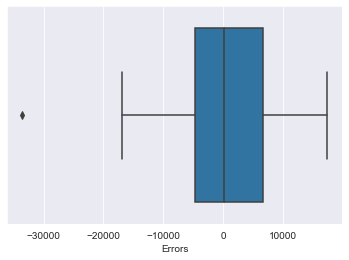

In [24]:
sns.boxplot(startups['Errors'])

<AxesSubplot:xlabel='Errors', ylabel='Count'>

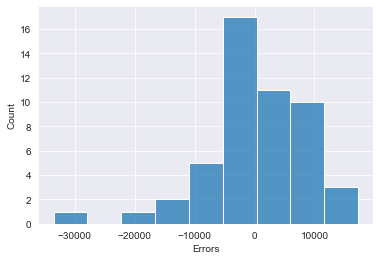

In [25]:
sns.histplot(startups['Errors'])

C:\Users\D_R\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Errors', ylabel='Density'>

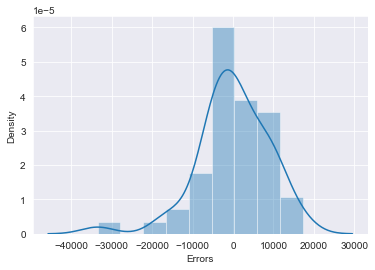

In [26]:
sns.distplot(startups['Errors'])

### Residual Plot for homoscedasticity

In [27]:
def get_standardize_values(vals):
    return (vals - vals.mean())/vals.std()

0     2.048512
1     1.962904
2     1.784550
3     1.569528
4     1.529906
5     1.312132
6     1.173034
7     1.221564
8     1.010891
9     1.090863
10    0.597857
11    0.599503
12    0.435750
13    0.393765
14    0.955090
15    0.870779
16    0.124749
17    0.462578
18    0.432599
19    0.092175
20    0.117733
21    0.135030
22    0.068557
23   -0.051297
24    0.034359
25   -0.248719
26   -0.035929
27    0.060951
28   -0.263418
29   -0.259984
30   -0.319591
31   -0.364489
32   -0.331068
33   -0.358709
34   -0.584549
35   -0.547086
36   -0.934491
37   -0.569784
38   -1.076695
39   -0.719666
40   -0.946456
41   -0.946797
42   -1.053210
43   -1.319192
44   -1.206108
45   -1.637667
46   -1.420992
47   -1.667184
48   -1.598972
49   -1.623304
dtype: float64
0    -0.029001
1     0.294602
2     0.995289
3     1.029070
4    -0.665334
5    -0.736666
6    -0.222642
7    -0.477210
8     0.052550
9    -0.572899
10    1.186432
11    0.970983
12    1.391517
13    0.762344
14   -1.894413
15   -1.82

Text(0, 0.5, 'Standardized residual values')

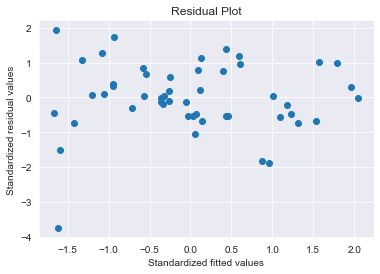

In [28]:
plt.scatter(get_standardize_values(model.fittedvalues),
            get_standardize_values(model.resid))

print(get_standardize_values(model.fittedvalues))
print(get_standardize_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')

### Residual vs Regressors

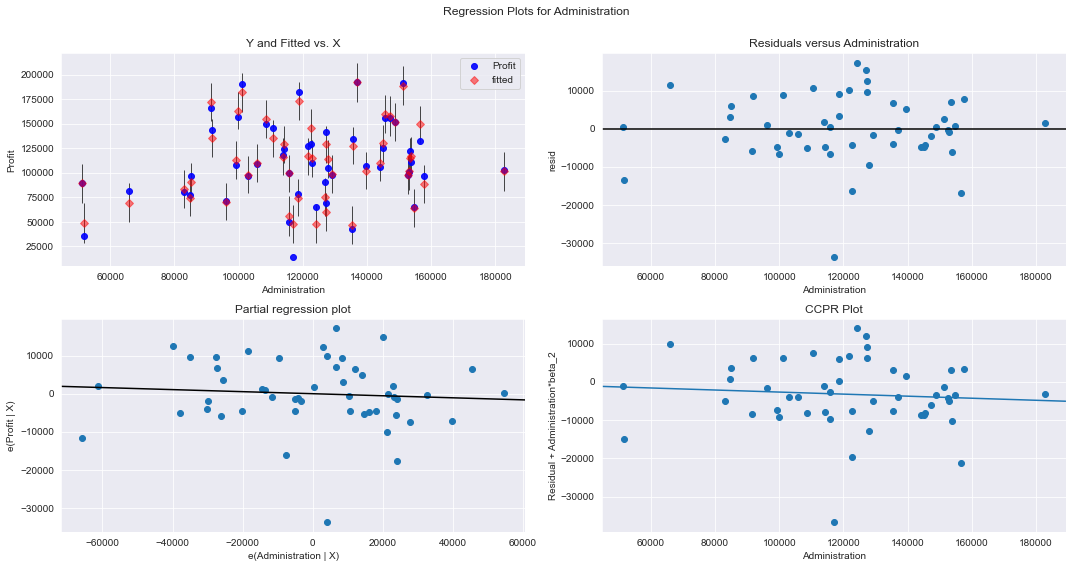

In [29]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Administration', fig=fig)

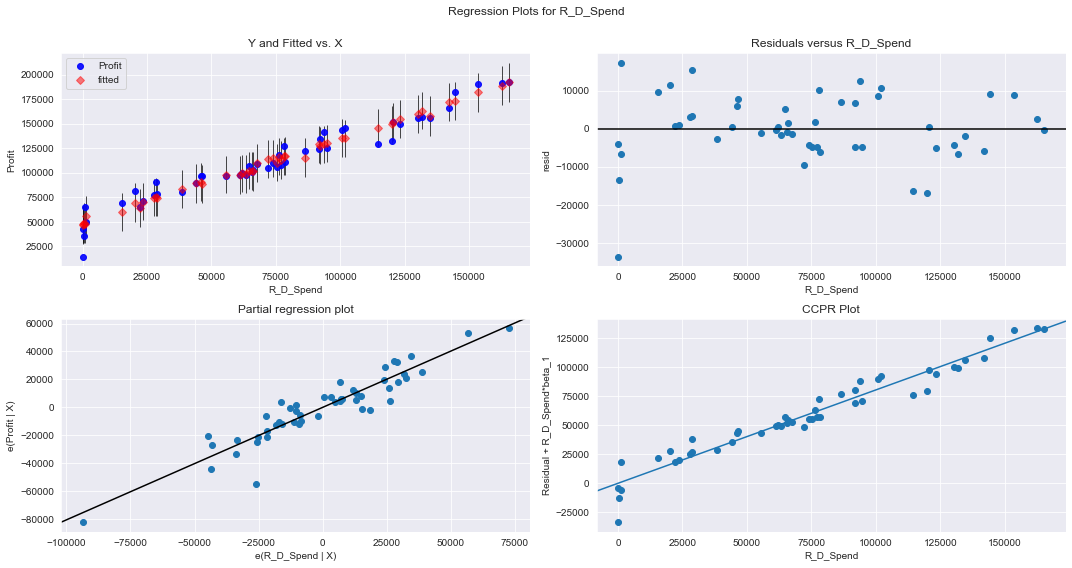

In [30]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'R_D_Spend', fig=fig)

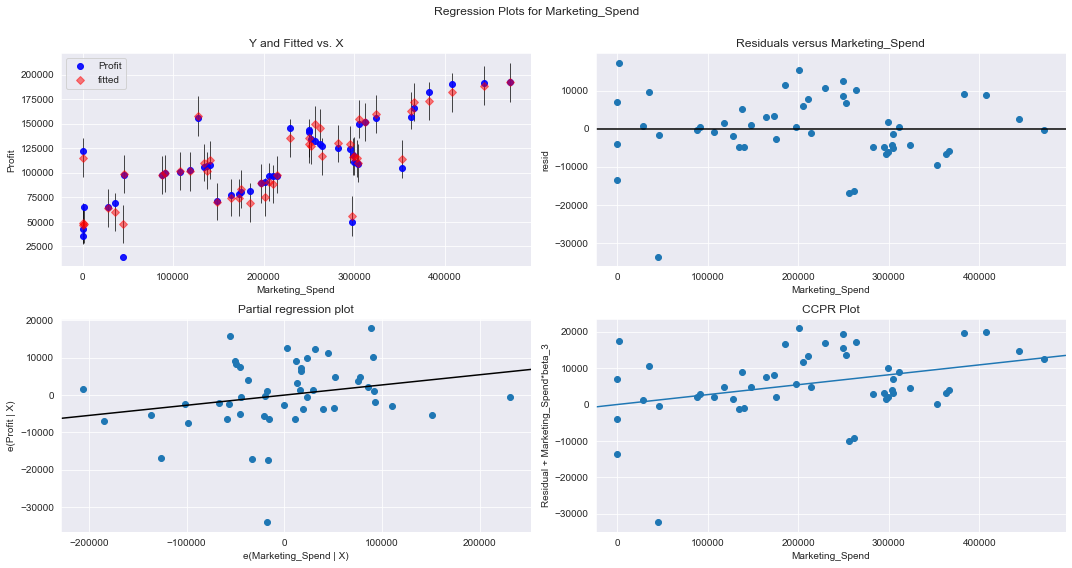

In [31]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, 'Marketing_Spend', fig=fig)

## Model deletion diagnostics

### Detecting Influencers/Outliers

### Cook's Distance

In [32]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

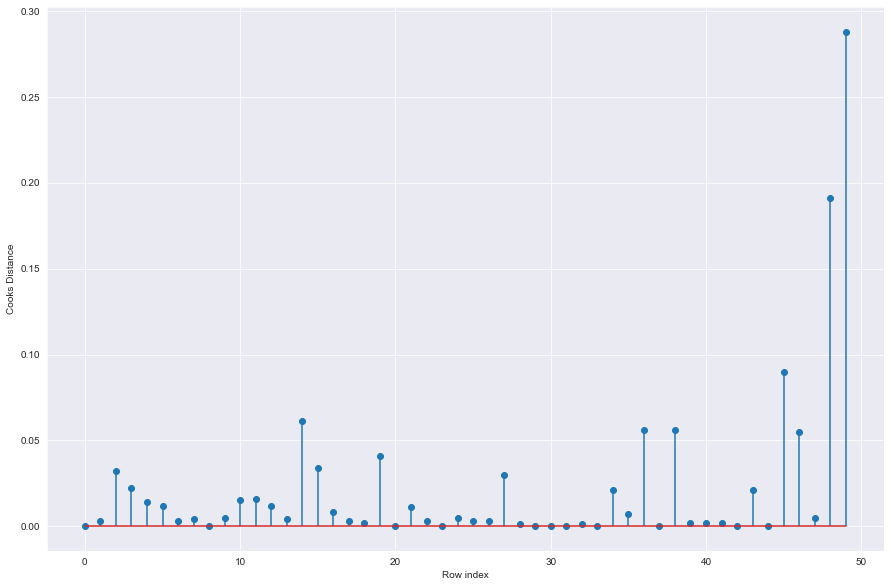

In [33]:
#Plot the influence values using stem plot
fig = plt.subplots(figsize = (15,10))
plt.stem(np.arange(len(startups)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
#index and value of influencer where c is greater than .5
(np.argmax(c), np.max(c))

(49, 0.28808229275432634)

### High influence points

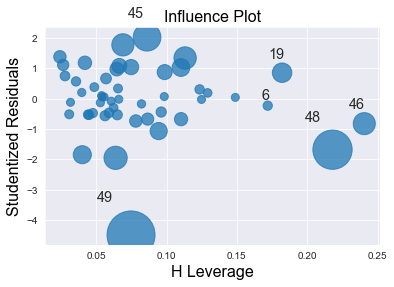

In [36]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [37]:
startups.shape

(50, 7)

In [38]:
# k = number of variables (columns)
# n = number of observations (rows)

k = startups.shape[1]
n = startups.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.48

### From the above plot, it is evident that data point 48 and 49 are influencers

In [39]:
startups[startups.index.isin([48,49])]

,R_D_Spend,Administration,Marketing_Spend,State,Profit,Predicted,Errors
48,542.05,51743.15,0.00,New York,35673.41,49171.388158,-13497.978158
49,0.00,116983.80,45173.06,California,14681.40,48215.134111,-33533.734111


In [40]:
startups.head()

,R_D_Spend,Administration,Marketing_Spend,State,Profit,Predicted,Errors
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183


### improving the model

In [41]:
# Discard the data points which are influencers and reassign the row number (reset_index())
startups1 = startups.drop(startups.index[[48,49]],axis = 0).reset_index()

In [42]:
startups1.head()

,index,R_D_Spend,Administration,Marketing_Spend,State,Profit,Predicted,Errors
0,0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183


In [43]:
# Drop the orignal index
startups1 = startups1.drop(['index'],axis = 1)

In [44]:
startups1

,R_D_Spend,Administration,Marketing_Spend,State,Profit,Predicted,Errors
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183
5,131876.90,99814.71,362861.36,New York,156991.12,163580.780571,-6589.660571
6,134615.46,147198.87,127716.82,California,156122.51,158114.096669,-1991.586669
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.363048,-4268.763048
8,120542.52,148718.95,311613.29,New York,152211.77,151741.699699,470.070301
9,123334.88,108679.17,304981.62,California,149759.96,154884.684110,-5124.724110


### Build Model

In [45]:
# Exclude variable 'R_D_Spend' and generate r-squared and AIC values
final_ml_rd = smf.ols('Profit~Administration+Marketing_Spend', data = startups1).fit()

In [46]:
(final_ml_rd.rsquared, final_ml_rd.aic)

(0.5625802937857887, 1110.8101546830774)

In [47]:
# Exclude variable 'Administration' and generate r-squared and AIC values
final_ml_ad = smf.ols('Profit~R_D_Spend+Marketing_Spend', data = startups1).fit()

In [48]:
(final_ml_ad.rsquared, final_ml_ad.aic)

(0.9609119875752479, 994.886442942941)

In [49]:
# Exclude variable 'Marketing_Spend' and generate r-squared and AIC values
final_ml_ms = smf.ols('Profit~R_D_Spend+Administration', data = startups1).fit()

In [50]:
(final_ml_ms.rsquared, final_ml_ms.aic)

(0.9613542664192156, 994.3402293693792)

#### Comparing above R-square and AIC values model 'final_ml_ms' has high R-square and low AIC value hence include variable 'R-D_Spend & Administration' so that collinearity problem would be resolved.

### Cook's Distance

In [51]:
model_influence_ms = final_ml_ms.get_influence()
(c_ms, _) = model_influence_ms.cooks_distance

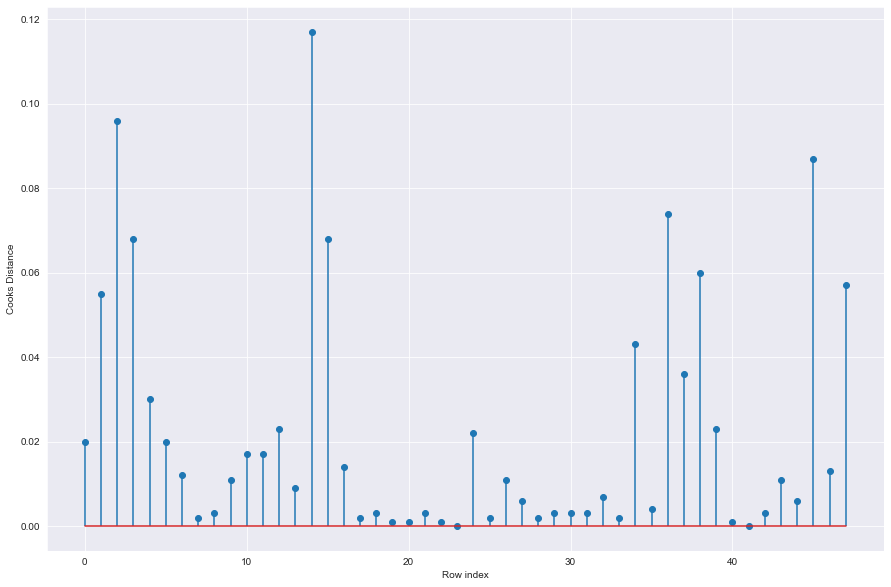

In [52]:
#Plot the influence values using stem plot
fig = plt.subplots(figsize = (15,10))
plt.stem(np.arange(len(startups1)), np.round(c_ms, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
# index of the data points where c is more than .5
(np.argmax(c_ms), np.max(c_ms))

(14, 0.11654464976722385)

In [54]:
# Drop 14 and 15 observations
startups2 = startups1.drop(startups1.index[[14,15]],axis = 0)

In [55]:
startups2

,R_D_Spend,Administration,Marketing_Spend,State,Profit,Predicted,Errors
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183
5,131876.90,99814.71,362861.36,New York,156991.12,163580.780571,-6589.660571
6,134615.46,147198.87,127716.82,California,156122.51,158114.096669,-1991.586669
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.363048,-4268.763048
8,120542.52,148718.95,311613.29,New York,152211.77,151741.699699,470.070301
9,123334.88,108679.17,304981.62,California,149759.96,154884.684110,-5124.724110


In [56]:
# reset the index and rearrange the row values
startups3 = startups2.reset_index()

In [57]:
startups4 = startups3.drop(['index'],axis = 1)

In [58]:
startups4

,R_D_Spend,Administration,Marketing_Spend,State,Profit,Predicted,Errors
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183
5,131876.90,99814.71,362861.36,New York,156991.12,163580.780571,-6589.660571
6,134615.46,147198.87,127716.82,California,156122.51,158114.096669,-1991.586669
7,130298.13,145530.06,323876.68,Florida,155752.60,160021.363048,-4268.763048
8,120542.52,148718.95,311613.29,New York,152211.77,151741.699699,470.070301
9,123334.88,108679.17,304981.62,California,149759.96,154884.684110,-5124.724110


In [59]:
# Build the model on the data
final_ml_ms = smf.ols('Profit~R_D_Spend+Administration', data = startups4).fit()

In [60]:
# Again check for influencer
model_influence_ms = final_ml_ms.get_influence()
(c_ms, _) = model_influence_ms.cooks_distance

Text(0, 0.5, 'Cooks Distance')

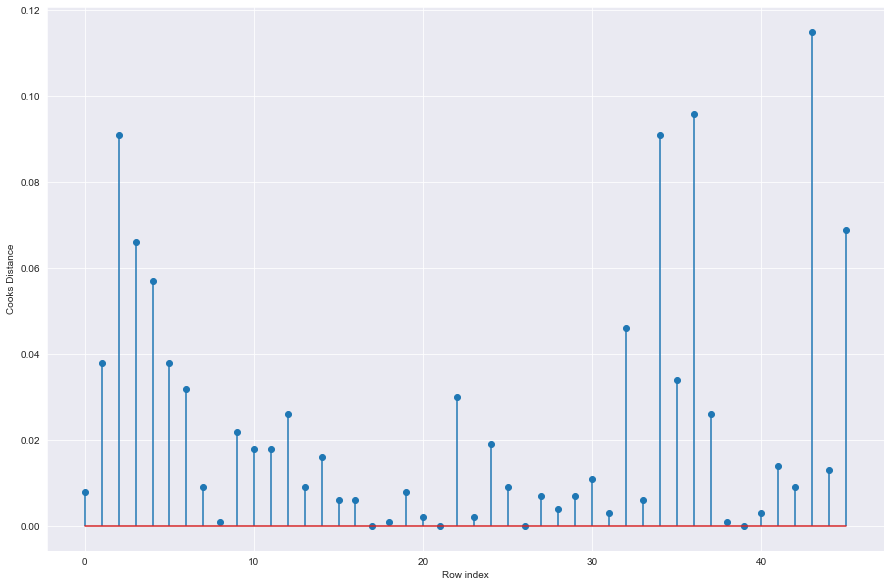

In [61]:
#Plot the influence values using stem plot
fig = plt.subplots(figsize = (15,10))
plt.stem(np.arange(len(startups4)), np.round(c_ms, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [62]:
# index of the data points where c is more than .5
(np.argmax(c_ms), np.max(c_ms))

(43, 0.11456005882834945)

### Since the value is <1, we can stop the diagnostic process and finalize the model

In [63]:
# Check the accuracy of the model
final_ml_ms = smf.ols('Profit~R_D_Spend+Administration', data = startups4).fit()

In [64]:
(final_ml_ms.rsquared, final_ml_ms.aic)

(0.9702109729346378, 942.7711220881625)

### Predicting for new data

In [65]:
startups4.head()

,R_D_Spend,Administration,Marketing_Spend,State,Profit,Predicted,Errors
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183


In [66]:
# New data for predicion
new_data = pd.DataFrame({'R_D_Spend' : 170000, 'Administration' : 120000, 'Marketing_Spend' : 450000},index = [1])

In [67]:
new_data

,R_D_Spend,Administration,Marketing_Spend
1,170000,120000,450000


In [68]:
final_ml_ms.predict(new_data)

1    194612.957839
dtype: float64